<a href="https://colab.research.google.com/github/apurv100/Bank_churn-rate-prediction-using-ann/blob/master/Hybrid_SOM_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.6-cp36-none-any.whl size=8525 sha256=772767e120d430cfc3561bc6610eefa5e44b74b93573cea287a6dc7bd08fda13
  Stored in directory: /root/.cache/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built MiniSom


## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [4]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
dataset.shape

(690, 16)

In [27]:
dataset[dataset['Class']==0]['Class'].count()

383

In [28]:
dataset[dataset['Class']==1]['Class'].count()

307

## Feature Scaling


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [8]:
X[::]

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

##Training the SOM


In [29]:
from minisom import MiniSom

In [34]:
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
## to be more precise one can increase the maps dimension(x,y) but here its fine we have low no. of observations
## we are basically finding outliers in our dataset which will be the frauds for us.
## the map finds the outliers by telling us the mean interneuron distances(MID) between winning node and others of them and plottting the map we can easily spot them
som.random_weights_init(X)
## for initalizing the weights or in this case of SOM we say charateristic plot point of input features.
som.train_random(data = X, num_iteration = 100)

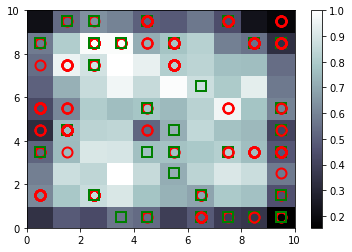

In [35]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [36]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(3,8)], mappings[(2,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [37]:
print('Fraud Customer IDs')
j=0
for i in frauds[:, 0]:
  print(int(i))
  j=j+1
print(j)

Fraud Customer IDs
15590434
15567839
15671014
15579583
15642336
15740487
15702571
15622083
15689692
15672357
15796813
15731166
15649379
15587297
15797246
15800773
15729771
15609823
15614813
15701687
15706268
15653147
15735572
15751167
15778142
15721507
15802106
15625501
15812918
15715519
15636562
15711249
15812766
15784526
15687765
15658504
15757306
15700046
15569595
15587443
15769356
15665181
15808223
43


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [38]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [39]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [47]:
import tensorflow as tf
tf.__version__

'2.2.0'

## Initializing the ANN

In [48]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [49]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [50]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [51]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [52]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 20)

Epoch 1/20
690/690 [==============================] - 1s 937us/step - loss: 0.4972 - accuracy: 0.9159
Epoch 2/20
690/690 [==============================] - 1s 961us/step - loss: 0.3593 - accuracy: 0.9377
Epoch 3/20
690/690 [==============================] - 1s 898us/step - loss: 0.2777 - accuracy: 0.9377
Epoch 4/20
690/690 [==============================] - 1s 935us/step - loss: 0.2324 - accuracy: 0.9377
Epoch 5/20
690/690 [==============================] - 1s 920us/step - loss: 0.2044 - accuracy: 0.9377
Epoch 6/20
690/690 [==============================] - 1s 940us/step - loss: 0.1854 - accuracy: 0.9377
Epoch 7/20
690/690 [==============================] - 1s 895us/step - loss: 0.1721 - accuracy: 0.9377
Epoch 8/20
690/690 [==============================] - 1s 938us/step - loss: 0.1612 - accuracy: 0.9377
Epoch 9/20
690/690 [==============================] - 1s 928us/step - loss: 0.1525 - accuracy: 0.9377
Epoch 10/20
690/690 [==============================] - 1s 928us/step - loss: 0.145

## Predicting test set results

In [55]:
y_pred=ann.predict(customers)

In [57]:
y_pred=np.concatenate((dataset.iloc[:,0:1].values,y_pred),axis=1)

In [58]:
y_pred

array([[1.57761560e+07, 1.00519801e-05],
       [1.57395480e+07, 1.14028156e-02],
       [1.56628540e+07, 2.76750326e-03],
       ...,
       [1.56754500e+07, 3.63345265e-01],
       [1.57764940e+07, 5.23012411e-03],
       [1.55924120e+07, 9.41878534e-06]])

In [59]:
y_pred.shape

(690, 2)

In [60]:
y_pred=y_pred[y_pred[:,1].argsort()]

In [61]:
type(y_pred)

numpy.ndarray

In [62]:
y_pred=pd.DataFrame(y_pred,columns=['Customer id','probablity of fraud'])

In [63]:
y_pred.head()

,Customer id,probablity of fraud
0,15621423.0,1.365361e-19
1,15799785.0,1.341742e-14
2,15706394.0,1.732332e-09
3,15790113.0,1.856423e-09
4,15705379.0,2.686918e-09


In [64]:
y_pred.to_csv("fraud_probablity.csv")

In [65]:
ls


Credit_Card_Applications.csv  fraud_probablity.csv  sample_data/
